In [1]:
import sys
sys.path.append('..')
import nbimport
nbimport.initialize()

In [2]:
from Stat_03 import *
css_styling()

# Fler-dimensionalle prøver

# Multi-dimensional samples

## Formål

- At udvide begrebet om _prøver_ (se [tidligere](#Prøver)) til flere dimensioner 
- At introducerer begrebet _kovarians_ 
- At kunne beregne gennemsnit, varians, spredning og kovarians - med og uden vægte - over en fler-dimensional prøve 

## Purpose

- To extend the concept of _samples_ (see [earlier](#Samples)) to multiple dimensions
- Introducing the concept of _covariance_
- Be able to calculate average, variance, spread, and covariance - 
  with and without weights - over a multi-dimensional sample

Tidligere kiggede vi på én-dimensionalle prøver af formen 

Earlier we looked at one-dimensional samples of the form

$$S_x = \{x_1,\ldots,x_N\}\quad,$$

hvor typisk $x\in\mathbb{R}$. Generelt kunne vi generalisere dette til at gælde for fler-dimensionalle observationer $x_i\in X^n$ (typisk $\mathbb{R}^n$).  Vi har da prøver af formen 

how typical $x\in\mathbb{R}$. We can generalize this to apply to multi-dimensional observations $x_i\in X^n$ (typically $\mathbb{R}^n$). We then have samples of the form

$$ S_x = \left\{\begin{bmatrix} x_{1,1} \\ \vdots\\ x_{n,1}\end{bmatrix},\ldots,
  \begin{bmatrix} x_{1,N} \\ \vdots\\ x_{n,N}\end{bmatrix}\right\}\quad,$$

hvor hver observation har $n$ indgange og vi har $N$ observationer.  Her vil vi dog være lidt dovne og skrive 

where each observation has $n$ entries and we have $N$ observations. Here, however, we will be a little lazy and write

$$x_i = \begin{bmatrix} x_{i,1} \\ \vdots \\ x_{i,n}\end{bmatrix}\quad,$$ 

og kun tilføje det andet index forsåvidt at det er nødvendigt. 

and only add the second index if needed.

## Gennemsnit og varians

Vi ser at gennemsnittet $\bar{x}$ for en prøve $X$ er givet på samme måde som for det en-dimensionalle tilfælde, hvor dog $\bar{x}$ er $n$-dimensional.  Hver komponent $\bar{x}_j$ er givet ved 

## Average and variance

We find that the average $\bar{x}$ for a sample $S_x$ is given in the same way as for the one-dimensional case, however $\bar{x}$ is $n$-dimensional. For each component $\bar{x}_j$ is given by

$$\bar{x}_j = \frac{1}{N} \sum_{i=1}^N x_{i,j}\quad.$$

For variansen $s_x^2$ finder vi samme resultat, hvor hver enkelt komponent er givet ved 

For the variance $s_x^2$ we find the same result where for each component it is given by

$$s^2_{x,j} = \frac{1}{N-1}\sum_{i=1}^N (x_{i,j} - \bar{x}_j)^2\quad.$$

### Eksempel: Fler-dimensional middelværdi og varians

Her vil vi lave en 3-dimensional prøve hvor vi trækker hver komponent fra en normalfordeling.  Vi vil derefter bruge *NumPy*  til at beregne gennemsnittet og variansen. 

### Example: Multi-dimensional mean and variance

Here we will make a 3-dimensional sample where we for each component sample from a normal distribution. We will then use *NumPy* to calculate the mean and variance.

In [3]:
from numpy.random import normal
from numpy import printoptions

x3d = normal(size=(100,3))
with printoptions(precision=3, suppress=True):
    print(f"Mean by method:     {x3d.mean(axis=0)}")
    print(f"Variance by method: {x3d.var(axis=0)}")

Mean by method:     [-0.024 -0.054  0.083]
Variance by method: [1.144 1.063 0.931]


## Usikkerheder på gennemsnit og varians

Da gennemsnittet og variansen for hver enkelt komponent ene og alene er givet ved observationerne af denne komponent, finder vi at variansen af gennemsnittet og variansen for denne ene komponent er det samme som i det én-dimensionelle tilfælde, hvorfor usikkerheden er give på samme måde 

\begin{align*}
  \delta_{\bar{x}_j} &= \sqrt{\frac{s^2_{x,j}}{N}}\\
  \delta_{s_{x,j}^2} &= \frac{1}{\sqrt{N}}\sqrt{s_{x,j}^4 - \left(s_{x,j}^2\right)^2}\\
  \delta_{s_x,j} &=  \frac{1}{2 s_{x,j}\sqrt{N}}\sqrt{s_{x,j}^4-\left(s_{x,j}^2\right)^2}\quad.
\end{align*}

Vi vil ikke gå yderligere ind i dette her, men blok bemærke at vi umiddelbart kan overfører mange resultater fra det én-dimensionalle tilfælde til det fler-dimensionalle tilfælde. 

## Uncertainties on average and variance

As the average and variance of each component are given solely by the observations of this component, we find that the variance of the average and the variance of each component is the same as in the one-dimensional case, and thus the uncertainties are the same

\begin{align*}
  \delta_{\bar{x}_j} &= \sqrt{\frac{s^2_{x,j}}{N}}\\
  \delta_{s_{x,j}^2} &= \frac{1}{\sqrt{N}}\sqrt{s_{x,j}^4 - \left(s_{x,j}^2\right)^2}\\
  \delta_{s_x,j} &=  \frac{1}{2 s_{x,j}\sqrt{N}}\sqrt{s_{x,j}^4-\left(s_{x,j}^2\right)^2}\quad.
\end{align*}

We will not go further into this, but note that we can immediately transfer many results from the one-dimensional case to the multidimensional case.

## Generalisering af varians: kovarians

Af udtrykket for den enkelte varians 

## Generalization of variance: covariance

From the expression for the individual variances

$$s^2_{x,j} = \frac{1}{N-1}\sum_{i=1}^N (x_{i,j} - \bar{x}_j)^2\quad,$$ 

kan vi definerer en mere general _statistik_ (en værdi afledt af vores prøve)

we can define a more general _statistic_ (a value derived from our sample)

$$c_{x,jk} = \frac1{N-1} \sum^N_{i=1} (x_{i,j}-\bar{x}_j) (x_{i,k} - \bar{x}_k)\quad,$$

som vi kalder _kovariansen_ (engl. [covariance](https://en.wikipedia.org/wiki/Covariance)).  Ligesom at variansen beskriver hvor meget en prøve varier omkring gennemsnittet, så udtrykker kovariansen variation i alle retninger i prøven.  Man kan forholdvist nemt vise at for $N\gg1$

which we call the [_covariance_](https://en.wikipedia.org/wiki/Covariance). Just as the variance describes how much a sample varies around the average, then the covariance expresses variation in all directions of the sample. One can relatively easily show that for $N\gg1$

$$ c_{x,jk} = \frac1N \sum^N_{i=1} x_{i,j} x_{i,k} - \left(\frac1N \sum_{i=1}^N x_{i,j}\right)\left(\frac1N \sum_{i=1}^N x_{i,k}\right)
= \overline{x_i x_j} - \bar{x_i}\bar{x_j}\quad,$$

analogt til variansen. 

Vi kan se at 

analogous to the variance.

We see that

$$ s^2_{x,j} = c_{x,jj}\quad,$$

og hvis vi opfatter $x_j = \left[\begin{smallmatrix} x_{1,j}\\ \vdots\\ x_{n,j}\end{smallmatrix}\right]\in\mathbb{R}^n$ som vektorer så ser vi at vi kan skrive 

and if we see $x_j = \left[\begin{smallmatrix} x_{1,j}\\ \vdots\\ x_{n,j}\end{smallmatrix}\right]\in\mathbb{R}^n$ as vectors, then we easily see that we can write

$$ C_x = \frac1{N-1}\sum_{i=1}^N (x_i-\bar{x}) (x_i-\bar{x})^T\quad,$$

eller summen af det _ydre produkt_ af vektorene $x_i-\bar{x}$.  Det vil sige at $C_x$ er en matrix i $\mathbb{R}^n\times\mathbb{R}^n$.  Af dette følger flere forskellige egenskaber ved $C_x$, f.eks. at denne matrix er _symmetrisk_ 

or the sum of the _outer product_ of the $x_i-\bar{x}$ vectors. That is, $C_x$ is a matrix in $\mathbb{R}^n\times\mathbb{R}^n$. Several properties of $C_x$ follows from this e.g., that the matrix is _symmetric_

$$ c_{x,jk} = c_{x,kj}\quad,$$ 

og 

and

$$ |c_{x,jk}|\leq \sqrt{s^2_{x,j} s^2_{x,k}}\quad.$$

### Eksempel: Kovarians 

Lad os beregne kovariansen af en prøve med $x_i\in\mathbb{R}^3$ hvor hver komponent er trukket fra en normalfordeling 

### Example: Covariance

Let us calculate the covariance of a sample with $x_i\in\mathbb{R}^3$ where each component is drawn from a normal distribution

In [4]:
from numpy import cov

c = cov(x3d,rowvar=False,ddof=0)

with printoptions(precision=3,suppress=True):
    print(f"Covariance:\n{c}")

Covariance:
[[ 1.144 -0.178 -0.098]
 [-0.178  1.063  0.125]
 [-0.098  0.125  0.931]]


Hvis 

If

$$ c_{x,jk} = 0\quad,$$ 

er komponenterne $x_{\cdot,j}$ og $x_{\cdot,k}$ _ukorreleret_.  På den anden side, så hvis to komponenter $x_{\cdot,j}$ og $x_{\cdot,k}$ er uafhængige så følger det at 

then components $x_{\cdot,j}$ and $x_{\cdot,k}$ _are uncorrelated_. On the other hand, if two components $x_{\cdot,j}$ and $x_{\cdot,k}$ are independent it follows that

$$ c_{x,jk} = 0\quad,$$

men det modsatte følger _ikke_.  Det vil sige, vi kan ikke slutte fra $c_{x,jk}=0$ til at $x_{\cdot,j}$ og $x_{\cdot,k}$ er uafhængige. _Uafhængighed_ forudsætter _ikke_ _ukorreleret_.  

but the converse does _not_ follow. That is, we cannot from $c_{x,jk}=0$ deduce that $x_{\cdot,j}$ and $x_{\cdot,k}$ are independent. _Independence_ is not predicated on  _uncorrelation_.

## Vægtet kovarians

Analogt til varians og det én-dimensionalle tilfælde kan vi definerer den vægtet kovarians.  Vi har dog to muligheder for at definerer den vægtet kovarians matrix: _Observations vægtet_ eller _komponent vægtet_. 

[_Observations vægtet_](https://en.wikipedia.org/wiki/Sample_mean_and_covariance#Weighted_samples) kovarians er givet ved 

## Weighted covariance

Analogously to the variance of the one-dimensional case, we can define the weighted covariance. However, we have two options for defining the weighted covariance matrix: _Observation weighted_ or _component weighted_.

[_Observations weighted_](https://en.wikipedia.org/wiki/Sample_mean_and_covariance#Weighted_samples) covariance is given by

$$ c^o_{x,jk} = \frac1A \sum_{i=1}^N w_i(x_{i,j}-\bar{x}_{w,j})(x_{i,k}-\bar{x}_{w,k})\quad,$$

hvor normaliseringsfaktoren $A$ afhænger af hvilke type vægte vi har 

where the normalization factor $A$ depends on the type of weights we have

$$
A = \sum_{i=1}^{N} w_i - \begin{cases} 
  0 & \text{frequency weights (biased)}\\
  1 & \text{frequency weights}\\
  \frac{\sum_{i=1}^{N} w_i^2}{\sum_{i=1}^{N} w_i} \\
  \end{cases}\quad,$$

og $\bar{x}_{w,j}$ er det _vægtet_ gennemsnit af den $j$'te komponent. Bemærk at vi har brugt _biased_ for _skævvredet_, og _frequency weights_ for frekvensvægte. 

and $\bar{x}_{w,j}$ is the _weighted_ average of the $j$th component.

For denne type vægte har alle komponenter af en given observation $x_i$ _samme_ vægt $w_i$.  Vi kan, for eksempel, have at vi simulerer begivenheder og tilordner en vægt efter sandsynligheden for en given begivenhed, eller vi kan have at observationerne $x_{i,j}$ alle bliver lavet af _samme_ observatør som har variabel effektivitet, eller lignende. 

For this type of weights, all components of a given observation have the same weight. For example, we may have simulated events and assign a weight to the probability of a given event, or we may have the observations $x_{i,j}$ all made by _the same_ observer having variable efficiency, or similar.

### Eksempel: Observationsvægtet kovarians

Lad os beregne den vægtet kovarians af 3 normalfordelte samtidige observationer.  Vi vil trække vores vægt fra en Poisson fordeling.  Lad $N=100$, $n=3$, så at 

- `x` er et $100\times3$ felt hvor hver række svarer til observationen $x_i$ 
- `w` er et $100$ felt hvor hver tal svarer til observationsvægten $w_i$

Her bruger vi 

$$A = \sum_{i=0}^{100} w_i\quad,$$

da vi sætter `ddof=0`. 

### Example: Observation-weighted covariance

Let's calculate the weighted covariance of 3 normally distributed simultaneous observations. We will draw our weight from a Poisson distribution. Let $N=100$, $n=3$, so that

- `x` is a $100\times3$ array where each row corresponds to the $x_i$ observation
- `w` is a $100$ field where each number corresponds to the observation weight $w_i$

Here we use

$$A = \sum_{i=0}^{100} w_i\quad,$$

since we set `ddof = 0`.

In [5]:
from numpy.random import poisson
from numpy import average 

w1 = poisson(10,size=x3d.shape[0])
c1 = cov(x3d,rowvar=False,fweights=w1,ddof=0)
m1 = average(x3d,axis=0,weights=w1)
with printoptions(precision=3,suppress=True):
    print(f"Weighted covariance (frequency,observation weights):\n{c1}")

Weighted covariance (frequency,observation weights):
[[ 1.209 -0.183 -0.067]
 [-0.183  1.097  0.14 ]
 [-0.067  0.14   0.909]]


Lad os nu istedet antage at vores vægte _ikke_ er frekvensvægte, men en eller anden slags effektivitet.  Igen har vi at `x` er et $100\times3$ felt, og `w` er et $100$ felt.  Vi genbruger vores vægte fra ovenover, men lader 

Let us now instead assume that our weights _are not_ frequency weights, but rather some kind of efficiency. Again we have that `x` is a $100\times3$ array, and `w` is a $100$ array. We recycle our weights from above but set

$$w_i\rightarrow \frac{w_i}{\sum_{i=1}^{100} w_i}\quad.$$

In [6]:
w2 = w1/w1.sum()
c2 = cov(x3d,rowvar=False,aweights=w2,ddof=0)
m2 = average(x3d,axis=0,weights=w2)
with printoptions(precision=3,suppress=True):
    print(f"Mean:\n{m2} versus\n{m1}")
    print(f"Weighted covariance (efficiency, observation weights):\n{c2}")

Mean:
[-0.069 -0.053  0.098] versus
[-0.069 -0.053  0.098]
Weighted covariance (efficiency, observation weights):
[[ 1.209 -0.183 -0.067]
 [-0.183  1.097  0.14 ]
 [-0.067  0.14   0.909]]


Kovariansen for _komponent vægte_ er mere kompliceret og givet ved 

The covariance with _component weights_ is more complicated and is given by

$$
c^k_{x,jk} = \frac{1}{B_{jk}}\sum_{i=1}^N w_{i,j}(x_{i,j}-\bar{x}_{w,j}) w_{i,k} (x_{i,k}-\bar{x}_{w,k})\quad,$$

hvor normaliseringen 

where the normalization

$$
B_{jk} = \sum_{i=1}^N w_{i,j} w_{i,k} - 
\begin{cases}
0 & \text{frequency weights (biased)}\\
1 & \text{frequency weights}\\
\frac{\sum_{i=1}^N (w_{i,j} w_{i,k})^2}
{\sum_{i=1}^N w_{i,j} w_{i,k}}
\end{cases}
\quad,
$$

nu i sig selv er en matrix.  Bemærk at vi har brugt _biased_ for _skævvredet_, og _frequency weights_ for frekvensvægte. _Komponentvægte_ optræder når hver enkelt observation har sin egen vægt.  Det kan for eksempel være en effiktivitet som funktion af transvers impuls, eller ligenden. 

now itself is a matrix. _Component weigts_ occur when each individual observation has its own weight.  This could be a transverse momentum dependent efficiency, or similar. 

### Eksempel: Komponent vægtet kovarians

*NumPy* har ingen indbygget funktionalitet for at beregne den _komponent vægtet_ kovarians, så her skriver vi en lille funktion der kan gøre det for os

### Example: Component weighted covariance

*NumPy* has no built-in functionality to calculate the _component weighted_ covariance, so here we write a small function that can do it for us

In [7]:
def cov(x,w,ddof=0,frequency=True,component=False):
    """Calculated weighted covariance"""
    from numpy import any, average, outer, add, cov as npcov
    if any(x.shape != w.shape):
        raise ValueError("Incompatible shapes of sample {} and weights {}"
                         .format(x.shape,w.shape))
        
    if not component:
        if frequency:
            return npcov(x,fweights=w,rowvar=False,ddof=ddof)
        else:
            return npcov(x,aweights=w,rowvar=False,ddof=ddof)
        
    # Calculate the weighted average in each dimension
    mean = average(x,axis=0,weights=w)
    
    # Subtract off mean 
    xx = x - mean
    
    # Calculate outer product of weights
    ww = [outer(wi,wi) for wi in w]
    
    # and observation vectors and element-wise product
    # of those two matrices 
    def part(wi,oi):
        return wi*outer(oi,oi)
    
    # Multiply weights on centered observations, and sum
    cc = add.reduce([part(wi,oi) for wi,oi in zip(ww,xx)])
    
    # Calculate sum of weights 
    sw = add.reduce(ww,dtype=x.dtype)
    
    # Calculate normalisation 
    norm = sw
    if frequency:
        norm -= ddof
    else:
        norm -= ddof*add.reduce([wij**2 for wij in ww]) / sw
    return cc / norm

Lad os bruge vores prøve og vægte fra tidligere, men replikerer hver _observations vægt_ 3 gange for hver observation, svarende til at alle komponenter har samme vægt

Let us use our sample and weights from earlier, but replicate every _observation weight_ 3 times for each observation, corresponding to all components having the same weight

$$ w_{i,j} = \sqrt{w_i}\quad.$$

Bemærk dog, at vi tager kvadratroden af hver vægt da vægtene optræder kvadratisk i den komponent vægtet kovarians. 

Note, however, that we take the square root of each weight as the weights appear squared in the component weighted covariance.

In [8]:
from numpy import sqrt, vstack

sw = sqrt(w1)
w3 = vstack((sw,sw,sw)).T
c3 = cov(x3d,w3,frequency=True,component=True)
m3 = average(x3d,axis=0,weights=w3)
with printoptions(precision=3,suppress=True):
    print(f"Mean:\n{m3} versus\n{m1}")
    print(f"Covariance:\n{c3} versus \n{c2}")

Mean:
[-0.044 -0.055  0.093] versus
[-0.069 -0.053  0.098]
Covariance:
[[ 1.209 -0.183 -0.067]
 [-0.183  1.097  0.14 ]
 [-0.067  0.14   0.909]] versus 
[[ 1.209 -0.183 -0.067]
 [-0.183  1.097  0.14 ]
 [-0.067  0.14   0.909]]


Lad os også prøve med ikke-frekvens vægte 

Let us also try with non-frequency weights

In [9]:
so = sqrt(w2)
w4 = vstack((so,so,so)).T
c4 = cov(x3d,w4,frequency=False,component=True)
m4 = average(x3d,axis=0,weights=w4)
with printoptions(precision=3,suppress=True):
    print(f"Mean:\n{m4} versus\n{m1}")
    print(f"Covariance:\n{c4} versus \n{c3}")

Mean:
[-0.044 -0.055  0.093] versus
[-0.069 -0.053  0.098]
Covariance:
[[ 1.209 -0.183 -0.067]
 [-0.183  1.097  0.14 ]
 [-0.067  0.14   0.909]] versus 
[[ 1.209 -0.183 -0.067]
 [-0.183  1.097  0.14 ]
 [-0.067  0.14   0.909]]


## Beregning af kovarians - afrundingsfejl 

## Calculation of covariance - rounding errors

Som vi så i det en-dimensionelle tilfælde så kræves _to_ gennemløb over data for at beregne kovariansen med mindst mulig afrundingsfejl.  I et senere afsnit ([her](##Robust-beregning-af-gennemsnit-og-(ko)varians)) vil vi formulere algoritmer der kan beregne disse statistiker med _mindst_ mulig afrundingsfejl. 

As we saw in the one-dimensional case, _two_ passes over data is required to calculate the covariance with the least possible rounding error. In a later section (see [here](#Robust-calculation-of-averages-and-(co)variances)) we will formulate algorithms that can calculate these statistics with _smallest_ possible rounding errors.

## Visuel repræsentation i flere dimensioner

## Visual representation in multiple dimensions

Visualisering af fler-dimensionel data er mildest talt besværlig.  For to dimension kan man lave et "scatter" plot som tegner hver eneste $(x,y)$ par som et punkt.  Lad os se et eksempel 

Visualizing multidimensional data is, to say the least, cumbersome. For two dimension one can make a "scatter" plot that draws each $(x,y)$ pair as a point. Let's see an example

`Scatter' plot i to dimensioner.

Scatter plot in two dimensions.

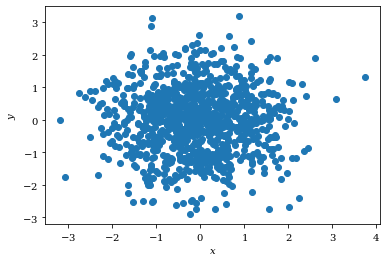

In [10]:
from matplotlib.pyplot import scatter, xlabel, ylabel

xy   = normal(size=(1000,2))
scatter(xy[:,0],xy[:,1])
xlabel('$x$')
ylabel('$y$');

I et scatter plot er tætheden af punkter et udtryk for hvor tæt punkterne ligger i prøven.  Alternativt kan vi bruge et to-dimensionelt histogram. 

In a scatter plot, the density of points is an expression of how close the points are in the sample. Alternatively, we can use a two-dimensional histogram.

To-dimensionelt histogram med _Matplotlib_.

Two-dimensional histogram with _Matplotlib_.

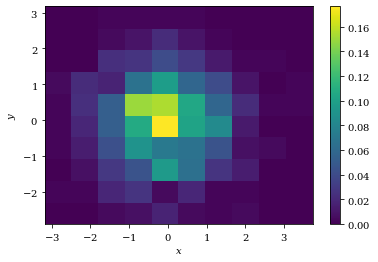

In [11]:
from matplotlib.pyplot import hist2d, colorbar

hist2d(xy[:,0],xy[:,1],density=True)
xlabel('$x$')
ylabel('$y$')
colorbar();

Men, lidt som `matplotlib.pyplot.hist` er det ikke helt trivelt at bruge `matplotlib.pyplot.hist2d`, i det uskkerhederne i hver bøtte ikke umiddelbart er repræsenteret.  Det er dog et generelt problem i fler-dimensionelle repræsentationer.  

Vi kan lave et såkaldt LEGO plot (hvorfor det hedder sådan er klart fra plottet) 

But, a little like `matplotlib.pyplot.hist`, it is not trivial to use `matplotlib.pyplot.hist2d`, as the uncertainties in each bin are not immediately represented. However, it is a general problem in multi-dimensional representations.

We can make a so-called LEGO plot (why it is so called is clear from the plot)

Boks eller LEGO plot af tre variable.

Box or LEGO plot of three variables.

In [12]:
from numpy import meshgrid, ones_like, histogram2d
from matplotlib.pyplot import subplot 
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D
ax = subplot(1,1,1,projection='3d')  # Needed for 3D

h, xb, yb = histogram2d(xy[:,0],xy[:,1],density=True)
b         = ones_like(h)*h.min()
xx, yy    = meshgrid(xb[:-1],          yb[:-1])
xw, yw    = meshgrid((xb[1:]-xb[:-1]), (yb[1:]-yb[:-1]))
e         = sqrt(h/(xw*yw*len(xy)))
x1, y1    = xx.ravel(), yy.ravel()
xd, yd,   = xw.ravel(), yw.ravel() 
xc, yc    = x1+xd/2,    y1+yd/2
z1, z2    = b.ravel(),  h.ravel()
zd        = z2 - z1

ax.bar3d(x1,y1,z1,xd,yd,zd)
ax.bar3d(x1,y1,z2,xd,yd,e.ravel()/2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$P_{xy}$');

Resultatet og koden ovenover er ikke ligefrem pæne.

The result and the code above are not exactly attractive.

**Historisk bemærkning**

> De to første LEGO plot (selvom de ikke blev kaldt det) stammer faktisk fra en artikel publiceret af 
> forskerer fra Niels Bohr Institutet i [_Nuclear Physics_ **B20**(1970) 441-450](http://inspirehep.net/search?p=find+j+Nucl.Phys.,B20,441).  Hans Bøggild _et al_ byggede et to-dimensionelt histogram i [Modulex](https://lego.fandom.com/wiki/Modulex) -
> et LEGO${}^{\mathrm{TM}}$ system til planlægning, design, osv.. Derefter tog de fotografier og 
> inkluderede dem i artiklen.   

**Historical note**

> The first two LEGO plots (although not called that at the time) actually appeared in an article 
> published by scientists from the Niels Bohr Institute in [_Nuclear Physics_ **B20** (1970) 441-450 ](http://inspirehep.net/search?p=find+j+Nucl.Phys.,B20,441). Hans Bøggild _et al_ built a two-dimensional
> histogram in [Modulex](https://lego.fandom.com/wiki/Modulex) - a LEGO${}^{\mathrm{TM}}$ system 
> for planning, design, etc. They then took photographs and included those in the article.

Endelig kan vi plotte histogrammet som punkter i rummet, hvor størrelsen reflekterer usikkerhederne 

Finally, we can plot the histogram as points in space where the size reflects the uncertainties

Scatter plot i tre dimension med usikkerhed i hvert punkt.

Scatter plot in three dimension with uncertainty at each point.

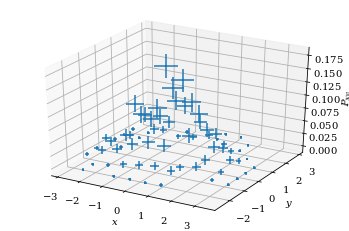

In [13]:
ax    = subplot(1,1,1,projection='3d')  # Needed for 3D
ppd   = 72./ax.figure.dpi               # Scale to plot
trans = ax.transData.transform
s     = [((trans((1,ee))-trans((0,0)))*ppd)[1]**2 for ee in e.ravel()]
ax.scatter3D(xc, yc, h.ravel(), s=s,marker='+',zorder=10)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$P_{xy}$');

Igen, ikke en særlig elegant eller informativ løsning. 

Again, not a particularly elegant or informative solution.

En anden mulighed er at lave et _scatter_ plot af data histogrammeret, sådan at markørernes størrelse og farve afhænger af antal tællinger.

Another option is to make a _scatter_ plot of the histogrammed data, such that the size and color of the markers depend on the number of counts.

In [14]:
def scatter_hist2d(x,y,*args,**kwargs):
    from numpy import histogram2d,meshgrid,diff,sqrt
    from matplotlib.pyplot import gca 
    ax = kwargs.pop('ax',gca())
    sc = kwargs.pop('scale',1)
    dn = kwargs.pop('density',True)
    bn = kwargs.pop('bins',10)
    
    h,bx,by = histogram2d(x,y,bins=bn,density=dn)
    h       = h.T
    cx,cy   = (bx[1:]+bx[:-1])/2, (by[1:]+by[:-1])/2
    wx,wy   = diff(bx), diff(by)
    xx, yy  = meshgrid(cx,cy)
    xw, yw  = meshgrid(wx,wy)
    e       = sqrt(h/(xw*yw*len(x)))

    return h,cx,cy,wx,wy,e,ax.scatter(xx.ravel(),yy.ravel(),h.ravel()*len(x)*sc,**kwargs)

To-dimensionelt histogram som et "scatter" plot.

Two-dimensional histogram as a "scatter" plot.

In [15]:
scatter_hist2d(*xy.T,scale=5,alpha=.5);

De fire måder at vise to-dimensionelle prøver på illustreret ovenover kan bruges i en snæver vending, men for flere dimensioner er disse løsninger ikke særlig brugbare. 

The four ways of displaying two-dimensional samples illustrated above can be used if absolutely necessary, but for several dimensions these solutions are not very useful.

I stedet vil vi udvikle en funktion til at lave et såkaldt _hjørne plot_.   Her vil vi lave en trekant af repræsentationer, hvor diagonalen viser fordelingen i en enkelt dimension, mens vi tegner korrelationen mellem dimensioner uden for diagonalen. 

Instead, we will develop a function to make a so-called _corner plot_. Here we will make a triangle of representations where the diagonal shows the distribution in a single dimension, while the off-diagonal plots show the the correlation between dimensions.

In [16]:
def corner_plot(*args,**kwargs):
    from numpy import tril_indices, triu_indices, ndarray, \
        histogram, diff, sqrt
    from matplotlib.pyplot import subplots,subplot2grid,\
        scatter,errorbar,sca
    from matplotlib.lines import Line2D
    
    if len(args) < 1:
        raise ValueError('No data given')
    
    d1 = args[0]
    try:
        _, n = d1.shape
    except:
        raise ValueError('1st argument not data')
    
    title = kwargs.pop('title','')
    leg   = kwargs.pop('legend',False)
    names = kwargs.pop('names', None)
    figkw = kwargs.pop('fig_kw',kwargs.pop('sub_kw',{}))
    if 'gridspec_kw' not in figkw:
        figkw['gridspec_kw']=dict(hspace=0,wspace=0)
    if 'sharex' not in figkw:
        figkw['sharex'] = 'col'
    if 'sharey' not in figkw:
        figkw['sharey'] = 'row'
    
    if isinstance(names,list) and len(names) < n:
        raise ValueError(f'Not enough {len(names)} '
                         f'names given, need {n}')
    elif isinstance(names,bool) and names:
        names = 'auto'
    
    if callable(names):
        tmp = [names(i) for i in range(n)]
        names = tmp   
    elif isinstance(names,str):
        fnam = lambda i,o : f'{chr(o+i)}'
        if (names == 'auto' and n < 4): 
            oo = ord('x')
        elif (names == 'auto' or names == 'alpha'):
            oo = ord('a')
        elif names == 'Alpha':
            oo = ord('A')
        else:
            oo  = ''
            fnam = lambda i,o : names.format(i)
            
        names = [fr'${fnam(i,oo)}$' for i in range(n)]
    
    fig, ax = subplots(ncols=n,nrows=n,**figkw)
    fig.suptitle(title)
    
    dax = [None]*n
    for i, j in zip(*triu_indices(n)):
        if i == j: 
            dax[i]  = ax[i,j].twinx()
            ax[i,j].yaxis.set_visible(False)
        else:
            ax[i,j].remove()

    def _varkw(varkw,idx,name):
        if varkw is None:
            return {}
        if isinstance(varkw,list):
            return varkw[idx].copy() if varkw[idx] is not None else {}
        return varkw.get(name).copy() if name in varkw else {}
    
    def _one(v,ax,dax,n,names,cur,**kwargs):
        dia    = kwargs.pop('dia', hist)
        off    = kwargs.pop('off', scatter)
        grid   = kwargs.pop('grid', False)
        diakw  = kwargs.pop('dia_kw',{})
        offkw  = kwargs.pop('off_kw',{})
        varkw  = kwargs.pop('var_kw',{})
        try:
            nv = len(varkw)
            #assert nv == n
        except:
            raise ValueError('Invalid var_kw argument - '
                             'not a sequence or wrong number of elements')
        diakw.update({k:kwargs[k] for k in kwargs if not hasattr(diakw,k)})
        offkw.update({k:kwargs[k] for k in kwargs if not hasattr(offkw,k)})
        if diakw.get('color','') == 'auto':
            diakw['color'] = 'C'+str(cur)
        if offkw.get('color','') == 'auto':
            offkw['color'] = 'C'+str(cur)
        
        for i, j in zip(*tril_indices(n)):
            a  = dax[i] if i == j else ax[i,j]
            sca(a)
            
            if grid: a.grid()

            xn = str(j)
            yn = str(i)
            if names is not None:
                xn = names[j]
                yn = names[i]
                if i == n-1:
                    ax[i,j].set_xlabel(xn)
                if j == 0 and i != 0:
                    ax[i,j].set_ylabel(yn) 
                    
            if i == j:
                xkw = _varkw(varkw,i,xn)
                if xkw.pop('log',False):
                    a.set_xscale('log')
                
                kw  = diakw.copy()
                kw.update(xkw)

                ar = dia(v[i],**kw)
            else:
                xkw = _varkw(varkw,j,xn)
                ykw = _varkw(varkw,i,yn)

                if ykw.pop('log',False):
                    a.set_yscale('log')
                xkw.pop('log',None)
                    
                kw  = offkw.copy()

                if 'bins' in xkw or 'bins' in ykw:
                    kw['bins'] = (xkw.pop('bins',10),ykw.pop('bins',10))

                kw.update(xkw)
                kw.update(ykw)

                off(v[j],v[i],**kw)
                
        if kwargs.get('label',False):
            return ar
        
    
    skip = 0
    cur  = 0
    ll   = []
    for o, d in enumerate(args):
        if skip > 0:
            skip -= 1
            continue
            
        try:
            _, m = d.shape 
        except:
            raise ValueError('Argument is not data')
        
        if n != m:
            raise ValueError(f'Data set {cur+1} of {m} variables not '
                             f'consistent with data set 1 of {n} variables')
    
        lbl=None
        kw=kwargs.copy()
        for oo in (o+1,o+2):
            if oo < len(args):
                if isinstance(args[oo],str):
                    kw['label'] = args[oo]
                    skip += 1
                elif isinstance(args[oo],dict):
                    kw.update(args[oo])
                    skip += 1
                    
            
        l = _one(d.T,ax,dax,n,names,cur,**kw)
        if l is not None:
            ll.append(l)
        cur += 1    
        
    if leg:
        o = (n+1)//2
        s = n//2
        lax = subplot2grid((n,n),(0,o),rowspan=s,colspan=s)
        lax.axis('off')
        lax.legend(ll,[l.get_label() for l in ll])
        
    return fig, ax, dax

Lad os tegne 4 variable, alle normal fordelt 

Let's draw 4 variables, all normal distributed

Et hjørne plot af 4 variable.  Diagonalen viser fordelingerne af de enkelte variable, mens den nedre trekant viser korrelationen mellem variable.

A corner plot of 4 variables. The diagonal shows the distributions of the individual variables, while the lower triangle shows the correlation between variables.

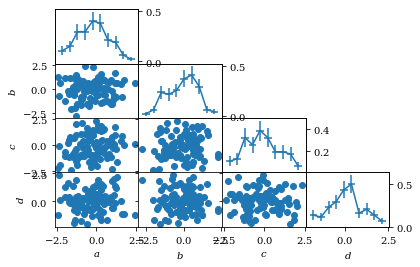

In [17]:
x = normal(size=(100,4))
corner_plot(x,names='alpha');

Vi kan selv bestemme hvorledes vi vil tegne diagonalen og de andre elementer.  Nedenunder bruger vi `matplotlib.pyplot.hist2d` væk fra diagonalen. 

We can customize how to draw the diagonal and the other elements.  Below we use `matplotlib.pyplot.hist2d` off-diagonal.

Et hjørneplot med 2D-histogrammer.

A corner plot with 2D histograms.

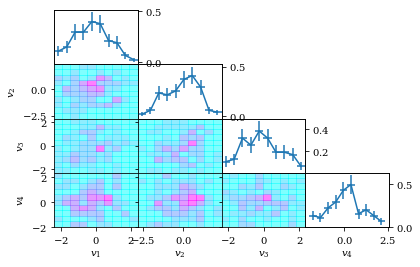

In [18]:
corner_plot(x,off=hist2d,names=lambda i: f'$v_{{{i+1}}}$',
            off_kw={'alpha':.5,'cmap':'cool'});

Og vi kan plotte mere end et data sæt som kan konfigurerers hver for sig eller sammen 

And we can plot more than one data set which can be configured separately or together

Et hjørne plot af to datasæt.

A corner plot of two datasets.

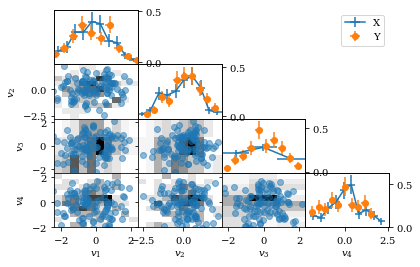

In [25]:
y = normal(size=(100,4))
corner_plot(x,'X',{'off':hist2d,'off_kw':{'cmap':'Greys'},
                   'var_kw':[None,None,{'bins':3},None]},
            y,{'dia_kw':{'fmt':'o'},'label':'Y'},
            legend=True, names=lambda i: f'$v_{{{i+1}}}$',
            off_kw={'alpha':.5});

## Opsumering

I dette afsnit har vi kigget på prøver af mere end én variabel.  Vi har kigget på gennemsnit, varians, og kovarians - både i det u-vægtet og vægtet tilfælde.  For det vægtet tilfælde har vi skelnet mellem _observationsvægte_ og _komponentvægte_, og mellem frekvens- og ikke-frekvensvægte.  

## Summary

In this section we looked at samples of more than one variable. We have looked at average, variance, and covariance - both in the unweighted and weighted case. For the weighted case we have distinguished between _observation weights_ and _component weights_, and between _frequency_ and _non_-frequency weights.

In [20]:
scatter_hist2d.__doc__=\
    """Draw a two-dimensional sample histogrammed as a 
    scatter plot 
    
    Parameters
    ----------
    x : array-like 
        First variable observations 
    y : array-like 
        Second variable observations
    kwargs : dict 
        Keyword arguments.  
        
        ax : matplotlib.axes.Axes
            Axes to draw in.  If not given use current axes 
        scale : float 
            Scalar of marker sizes 
        density : bool 
            Density argument for `numpy.histogram2d` 
        bins : int, array-like, str 
            Bins argument for `numpy.histogram2d` 
        kwargs : dict 
            Other keywords are passed to `matplotlib.pyplot.scatter`
    
    Returns
    ------- 
    h : array-like, 2-dimensional
        Density 
    x, y : array-like, 1-dimensional 
        Center of bins 
    wx, wy : array-like, 1-dimensional
        width of bins 
    e : array-like, 2-dimensional 
        Uncertainties
    artist : 
        Scatter plot artist 
    """

In [21]:
corner_plot.__doc__=\
    """Draw a corner plot of several variables.  
    
    This will produce a trianguler plot of the passed data. On the 
    diagonal the distribution of each variable is represented.  The 
    off-diagonal elements are the correlation between pair-wise 
    variables.  
    
    Exactly how the representations are made can be customized by 
    the keywords `dia` and `off`, for the diagnoal and off-diagonal 
    elements.  What ever function passed to these keywords must plot 
    in the current axes. 
    
    The function can plot multiple data sets, each which can be given a 
    label by passing a string after the data set.  Optionally, each 
    data set can be further customized by passing a full dictionary 
    of keywords after the data set. 
    
    Parameters
    ----------
    args : misc 
        Data sets to plot. 
        Each data set may be followed by a string (which will be the 
        label of that data set), or a dict of keywords, or both 
        
        The keywords can be any of the below, except legend, names, 
        title, and fig_kw 
        
    kwargs : dict, optional 
        Keywords 
        
        names : array-like or str 
            Name of each variable or an option string 
            
            'auto' : If the number of variables is less than 3, 
                then set names to be 'x', 'y', 'z'. Otherwise 
                the same as 'alpha'
            'alpha' : Label the variables 'a', 'b', ... 
            'Alpha' : Label the variables 'A', 'B', ... 
            str : A  format specifier, which must 
                accept a single integer argument.  For example 
                'v_{{{}}}' would produce 'v_{1}','v_{2}',...
        
        legend : bool 
            If true, produce a legend of each data set 
            
        title : str 
            Title of figure 
            
        fig_kw : dict 
            Keywords to pass to figure creation 
            
        sub_kw : dict 
            keywords to pass to sub-plot creation 
            
        dia : callable 
            Function to draw representation of a single variable. 
            The function must accect an array of a single variable 
            and keyword arguments.  That is 
            
            
                dia(x,**kwargs)
                
            The default is to draw a histogram of the variable 
                
        dia_kw : dict 
            Keyword arguments to pass to `dia` 
            
        off : callable 
            Funtion to draw representation of two variables.  The 
            function must accept two arrays of variables and 
            keyword arguments.  That is 
            
                off(x,y,**kwargs)
                
            The default is to draw a scatter plot of the variable 
                
        off_kw : dict 
            Keywords to pass to `off` 
            
        var_kw : dict or list 
            A dictionary or list of keyword-value pairs for each variable. 
            If a list, then there must be as many elements as there are variables. 
            If a dictionary, then this is indexed by the variable names specified 
            in the `names` keyword argument. 
            
        grid : bool 
            If true, draw grid on axes 
            
        color : color-spec or 'auto'
            If 'auto', use data sample color 
            
    See also 
    --------
    scatter_hist2d, plot_hist
            
    """